In [50]:
import os
import matplotlib.pyplot as plt

def read_data_from_file(filename, flag=0):
    with open(filename, "r") as f: 
        lines = f.readlines()
        if flag == 0:
            data = [line.replace('\n','').split() for line in lines]
        elif flag == 1:
            data = [line.replace('\n','').split('::') for line in lines]
    return data

def read_data_from_file_float(filename, flag=0):
    with open(filename, "r") as f: 
        lines = f.readlines()
        if flag == 0:
            data = [str_list_to_float(line.split()) for line in lines]
        elif flag == 1:
            data = [str_list_to_float_abs(line.split()) for line in lines]
    return data

def str_list_to_int(str_list):
    return [int(item) for item in str_list]

def str_list_to_float_abs(str_list):
    return [abs(float(item)) for item in str_list]

def str_list_to_float(str_list):
    return [float(item) for item in str_list]


def get_test_files(data):
	dataset = ['Movielenz']
	# dataset = ['Modcloth']
	dataset = ['Taobao2014','Gowalla']
	dataset = [data]
	emb_algo = ['BPR']
	emb_algo = ['LightGCN']


	dyn_models = ['finetune']
	dyn_models = ['finetune-nonseq']
	dyn_models = ['fulltrain']
	dyn_models = ['fulltrain','fulltrain-seq','finetune-nonseq','finetune']
	dyn_models = ['fulltrain','finetune-nonseq','finetune']

	n_snapshots = 5
	split_type = 'size'


	num_negs = [4]
	num_negs_fair = [4]
	DRMs = ['log']
	DRMs = ['none']
	DRM_weight = [0.5]
	# DRM_weight = [4.0]
	taus = [3.0]
	random_seeds = [2021]
	tepochs = [500]
	gpu = 2
	batch_sizes = [256]
	lrs = [0.001]
	l2s = [0.0001]
	l2s = ['1e-05']
	epoch = 500

	# os.chdir('src')

	test_result_files = []
	for random_seed in random_seeds:
		for data in dataset:
			if data == 'Modcloth':
				train_ratio = 0.7
			elif data == 'Movielenz':
				train_ratio = 0.6
			else:
				train_ratio = 0.6
			for model in emb_algo:
				for m in dyn_models:
					for DRM in DRMs:
						if DRM == 'none':
							DRM_weight_ = [1.0]
						else:
							DRM_weight_ = DRM_weight
						for drm_w in DRM_weight_:
							for num_neg in num_negs:
								for num_neg_fair in num_negs_fair:
									for tepoch in tepochs:
										for tau in taus:
											for lr in lrs:
												for l2 in l2s:
													for batch_size in batch_sizes:
		
														s_fname = '{}_{}_{}_s{}'.format(split_type, train_ratio, batch_size, n_snapshots)
														#log_args = [init_args.model_name, args.dataset, args.suffix, args.s_fname] # + str(args.test_length)]
														log_args1 = [data, s_fname, m] # + str(args.test_length)]
														if 'fulltrain' in m or 'pretrain' in m:
															tepoch_ = -1
														else:
															tepoch_ = tepoch

							
														if DRM =='none':
															params = ['lr','l2','epoch', 'tepoch', 'num_neg', 'random_seed']
															arg_values = [lr, l2, epoch, tepoch_, num_neg, random_seed]
														else:
															# if drm_w == 1.0:
															# 	params = ['lr','l2','epoch', 'tepoch', 'num_neg', 'num_neg_fair', 'DRM', 'tau']
															# 	arg_values = [lr, l2, epoch, tepoch_, num_neg, num_neg_fair, DRM, tau]
															# else:
															params = ['lr','l2','epoch', 'tepoch', 'num_neg','num_neg_fair', 'DRM', 'DRM_weight', 'tau', 'random_seed']
															arg_values = [lr, l2, epoch, tepoch_, num_neg, num_neg_fair, DRM, drm_w, tau, random_seed]
														
														log_args2 = []
														for arg, v in zip(params, arg_values):
															log_args2.append('{}={}'.format(arg, v))
														log_file_name1 = '__'.join(log_args1).replace(' ', '__')
														log_file_name2 = '__'.join(log_args2).replace(' ', '__')
														# log_file_name += args.message

														if False and DRM == 'log-onlypos':
															#if m != 'pretrain':
															dummy_test_result_files.append('test_result/{}/{}/{}/'.format(model, log_file_name1, log_file_name2))
															print('test_result/{}/{}/{}/'.format(model, log_file_name1, log_file_name2))
														else:
															test_result_files.append('test_result/{}/{}/{}/'.format(model, log_file_name1, log_file_name2))
															#print('test_result/{}/{}/{}/'.format(model, log_file_name1, log_file_name2))
															
	return test_result_files, n_snapshots


def create_comparison(file_list):
	accuracies = {}

	for file in file_list:
		file_ = file + '_test_mean'

		if os.path.isfile(file_) is False:
			continue
		lines = read_data_from_file(file_)
		for i, line in enumerate(lines):
			if accuracies.get(line[0]) is None:
				accuracies[line[0]] = []
			accuracies[line[0]].append(float(line[1]))

	for key, value in accuracies.items():
		print(key, end='\t')
		for v in value:
			print(v, end='\t')
		print('\n', end='')

	with open('table.txt', 'w') as f:
		for key, value in accuracies.items():
			f.write(key)
			for v in value:
				f.write('\t' + str(v))
			f.write('\n')

def create_trend(file_list, n_snapshots):
	accuracies = {}

	for file in file_list:
		file_ = file + '_test_trend'
		print(file_)
		if os.path.isfile(file_) is False:
			continue
		print(file_)
		lines = read_data_from_file(file_)
		for i, line in enumerate(lines):
			if accuracies.get(line[0]) is None:
				accuracies[line[0]] = []
			accuracies[line[0]].append([float(i) for i in line[1:]])

	# for key, value in accuracies.items():
	# 	for v in value:
	# 		print(key, end='\t')
	# 		for vv in v:
	# 			print(vv, end='\t')
	# 		print('\n', end='')
		
		# print(key, end='\t')
		# for v in value:
		# 	print(v, end='\t')
		# print('\n', end='')
			
	# make line plot with matplib
	for key, value in accuracies.items():
		cnt = 0
		#labels = ['full-retrain(non-seq)','full-retrain(seq)','fine-tune(non-seq)','fine-tune(seq)']
		labels = ['full-retrain','fine-tune(non-seq)','fine-tune(seq)']
		mean = []
		for v in value:
			
			plt.plot(range(int(n_snapshots)),v, label=labels[cnt]+' [{:.4f}]'.format(float(sum(v)/len(v))))
			# mark mean value
			#plt.plot(range(10), [sum(v)/len(v)]*10, linestyle='dashed')
			cnt += 1
			mean.append(sum(v)/len(v))
		
		plt.xlabel('time stages')
		plt.ylabel(key)
		plt.legend()
		plt.xticks(range(int(n_snapshots)))
		plt.show()

		for a,b in zip(labels, mean):
			print('{}:\t{:.4f}\t'.format(a,b))
		
		

			

	# with open('trend.txt', 'w') as f:
	# 	for key, value in accuracies.items():
	# 		for v in value:
	# 			f.write(key)
	# 			for vv in v:
	# 				f.write('\t' + vv)
	# 			f.write('\n')

test_result/LightGCN/Taobao2014__size_0.6_256_s5__fulltrain/lr=0.001__l2=1e-05__epoch=500__tepoch=-1__num_neg=4__random_seed=2021/_test_trend
test_result/LightGCN/Taobao2014__size_0.6_256_s5__fulltrain/lr=0.001__l2=1e-05__epoch=500__tepoch=-1__num_neg=4__random_seed=2021/_test_trend
test_result/LightGCN/Taobao2014__size_0.6_256_s5__finetune-nonseq/lr=0.001__l2=1e-05__epoch=500__tepoch=500__num_neg=4__random_seed=2021/_test_trend
test_result/LightGCN/Taobao2014__size_0.6_256_s5__finetune-nonseq/lr=0.001__l2=1e-05__epoch=500__tepoch=500__num_neg=4__random_seed=2021/_test_trend
test_result/LightGCN/Taobao2014__size_0.6_256_s5__finetune/lr=0.001__l2=1e-05__epoch=500__tepoch=500__num_neg=4__random_seed=2021/_test_trend
test_result/LightGCN/Taobao2014__size_0.6_256_s5__finetune/lr=0.001__l2=1e-05__epoch=500__tepoch=500__num_neg=4__random_seed=2021/_test_trend


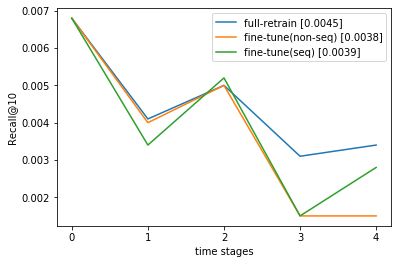

full-retrain:	0.0045	
fine-tune(non-seq):	0.0038	
fine-tune(seq):	0.0039	


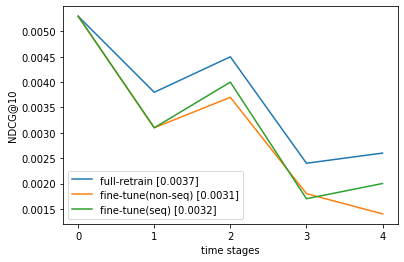

full-retrain:	0.0037	
fine-tune(non-seq):	0.0031	
fine-tune(seq):	0.0032	


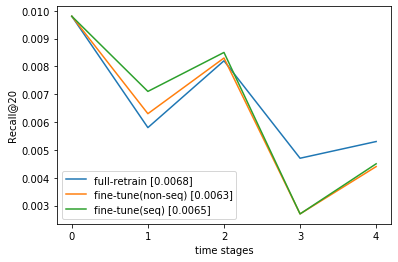

full-retrain:	0.0068	
fine-tune(non-seq):	0.0063	
fine-tune(seq):	0.0065	


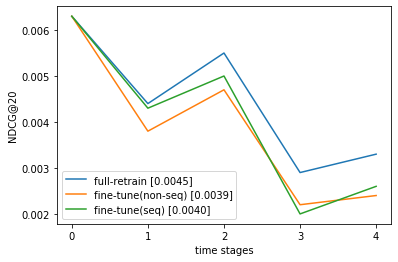

full-retrain:	0.0045	
fine-tune(non-seq):	0.0039	
fine-tune(seq):	0.0040	


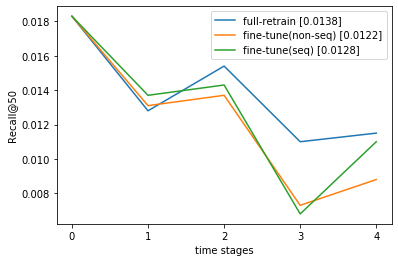

full-retrain:	0.0138	
fine-tune(non-seq):	0.0122	
fine-tune(seq):	0.0128	


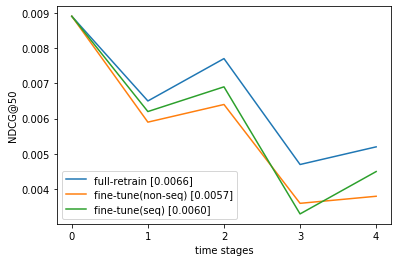

full-retrain:	0.0066	
fine-tune(non-seq):	0.0057	
fine-tune(seq):	0.0060	
test_result/LightGCN/Gowalla__size_0.6_256_s5__fulltrain/lr=0.001__l2=1e-05__epoch=500__tepoch=-1__num_neg=4__random_seed=2021/_test_trend
test_result/LightGCN/Gowalla__size_0.6_256_s5__fulltrain/lr=0.001__l2=1e-05__epoch=500__tepoch=-1__num_neg=4__random_seed=2021/_test_trend
test_result/LightGCN/Gowalla__size_0.6_256_s5__finetune-nonseq/lr=0.001__l2=1e-05__epoch=500__tepoch=500__num_neg=4__random_seed=2021/_test_trend
test_result/LightGCN/Gowalla__size_0.6_256_s5__finetune-nonseq/lr=0.001__l2=1e-05__epoch=500__tepoch=500__num_neg=4__random_seed=2021/_test_trend
test_result/LightGCN/Gowalla__size_0.6_256_s5__finetune/lr=0.001__l2=1e-05__epoch=500__tepoch=500__num_neg=4__random_seed=2021/_test_trend
test_result/LightGCN/Gowalla__size_0.6_256_s5__finetune/lr=0.001__l2=1e-05__epoch=500__tepoch=500__num_neg=4__random_seed=2021/_test_trend


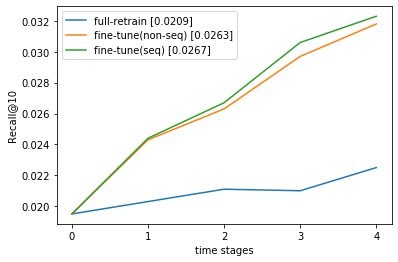

full-retrain:	0.0209	
fine-tune(non-seq):	0.0263	
fine-tune(seq):	0.0267	


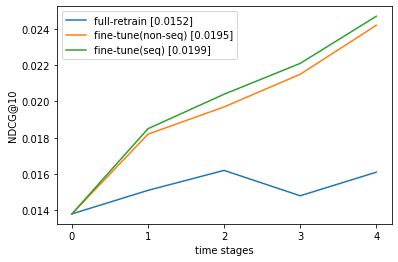

full-retrain:	0.0152	
fine-tune(non-seq):	0.0195	
fine-tune(seq):	0.0199	


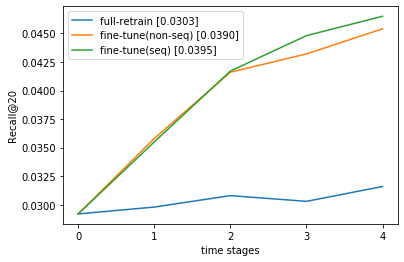

full-retrain:	0.0303	
fine-tune(non-seq):	0.0390	
fine-tune(seq):	0.0395	


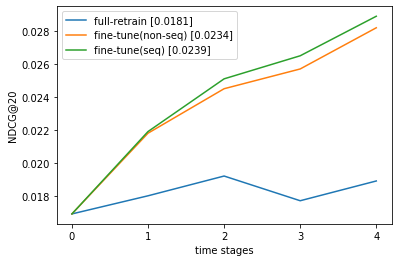

full-retrain:	0.0181	
fine-tune(non-seq):	0.0234	
fine-tune(seq):	0.0239	


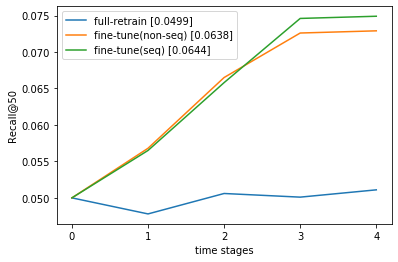

full-retrain:	0.0499	
fine-tune(non-seq):	0.0638	
fine-tune(seq):	0.0644	


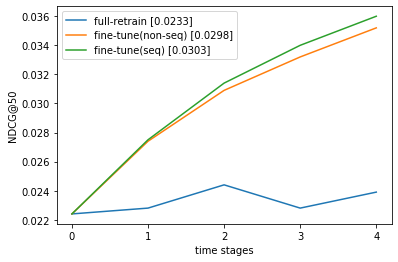

full-retrain:	0.0233	
fine-tune(non-seq):	0.0298	
fine-tune(seq):	0.0303	


In [51]:
# LightCGN, Taobao
a, b = get_test_files('Taobao2014')
create_trend(a, b)
a, b = get_test_files('Gowalla')
create_trend(a, b)

test_result/LightGCN/Movielenz__size_0.6_256_s10__fulltrain/lr=0.001__l2=0.0001__epoch=500__tepoch=-1__num_neg=4__random_seed=2021/_test_trend
test_result/LightGCN/Movielenz__size_0.6_256_s10__finetune-nonseq/lr=0.001__l2=0.0001__epoch=500__tepoch=500__num_neg=4__random_seed=2021/_test_trend
test_result/LightGCN/Movielenz__size_0.6_256_s10__finetune/lr=0.001__l2=0.0001__epoch=500__tepoch=500__num_neg=4__random_seed=2021/_test_trend


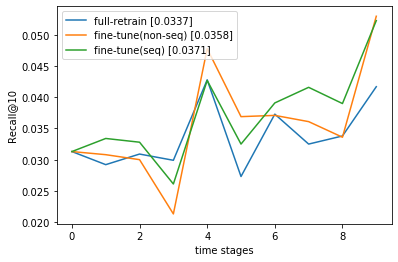

full-retrain:	0.0337	
fine-tune(non-seq):	0.0358	
fine-tune(seq):	0.0371	


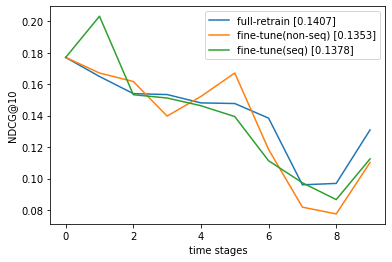

full-retrain:	0.1407	
fine-tune(non-seq):	0.1353	
fine-tune(seq):	0.1378	


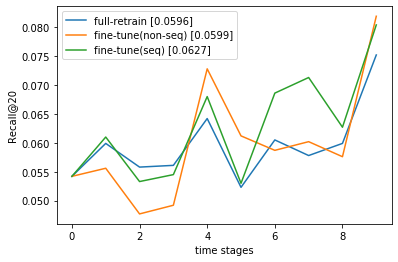

full-retrain:	0.0596	
fine-tune(non-seq):	0.0599	
fine-tune(seq):	0.0627	


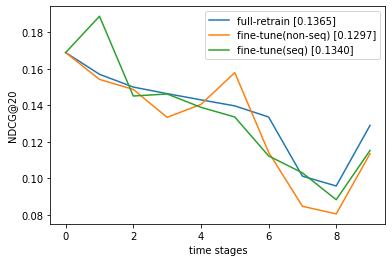

full-retrain:	0.1365	
fine-tune(non-seq):	0.1297	
fine-tune(seq):	0.1340	


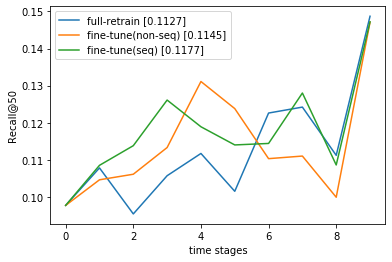

full-retrain:	0.1127	
fine-tune(non-seq):	0.1145	
fine-tune(seq):	0.1177	


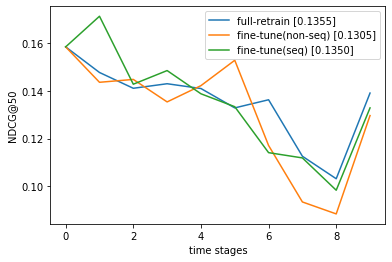

full-retrain:	0.1355	
fine-tune(non-seq):	0.1305	
fine-tune(seq):	0.1350	


In [4]:
# LightCGN, Movielenz
create_trend(get_test_files())

test_result/LightGCN/Modcloth__size_0.7_256_s10__fulltrain/lr=0.001__l2=0.0001__epoch=500__tepoch=-1__num_neg=4__random_seed=2021/_test_trend
test_result/LightGCN/Modcloth__size_0.7_256_s10__finetune-nonseq/lr=0.001__l2=0.0001__epoch=500__tepoch=500__num_neg=4__random_seed=2021/_test_trend
test_result/LightGCN/Modcloth__size_0.7_256_s10__finetune/lr=0.001__l2=0.0001__epoch=500__tepoch=500__num_neg=4__random_seed=2021/_test_trend


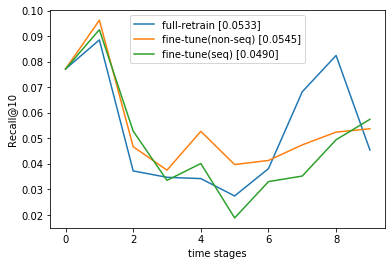

full-retrain:	0.0533	
fine-tune(non-seq):	0.0545	
fine-tune(seq):	0.0490	


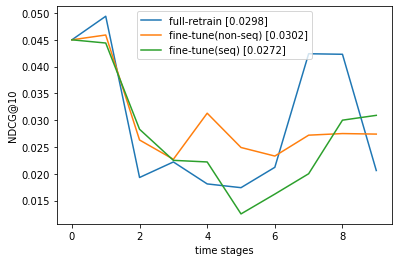

full-retrain:	0.0298	
fine-tune(non-seq):	0.0302	
fine-tune(seq):	0.0272	


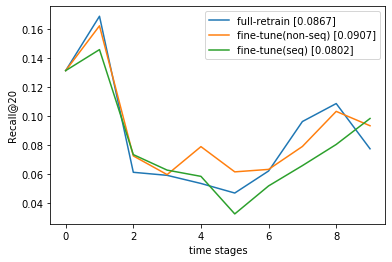

full-retrain:	0.0867	
fine-tune(non-seq):	0.0907	
fine-tune(seq):	0.0802	


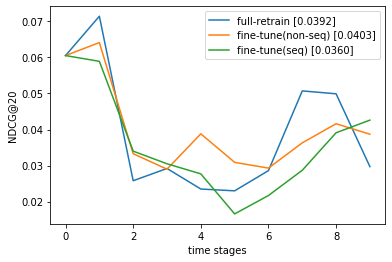

full-retrain:	0.0392	
fine-tune(non-seq):	0.0403	
fine-tune(seq):	0.0360	


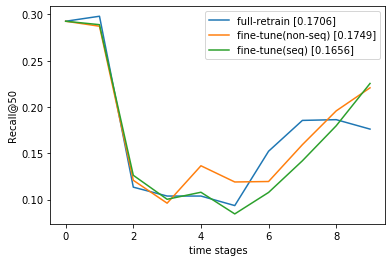

full-retrain:	0.1706	
fine-tune(non-seq):	0.1749	
fine-tune(seq):	0.1656	


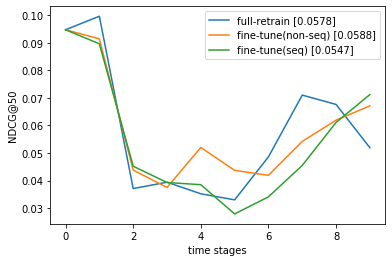

full-retrain:	0.0578	
fine-tune(non-seq):	0.0588	
fine-tune(seq):	0.0547	


In [2]:
# LightCGN, Modcloth
create_trend(get_test_files())

test_result/LightGCN/Movielenz__size_0.6_256_s10__fulltrain/lr=0.001__l2=0.0001__epoch=500__tepoch=-1__num_neg=4__random_seed=2021/_test_trend
test_result/LightGCN/Movielenz__size_0.6_256_s10__fulltrain-seq/lr=0.001__l2=0.0001__epoch=500__tepoch=-1__num_neg=4__random_seed=2021/_test_trend
test_result/LightGCN/Movielenz__size_0.6_256_s10__finetune-nonseq/lr=0.001__l2=0.0001__epoch=500__tepoch=500__num_neg=4__random_seed=2021/_test_trend
test_result/LightGCN/Movielenz__size_0.6_256_s10__finetune/lr=0.001__l2=0.0001__epoch=500__tepoch=500__num_neg=4__random_seed=2021/_test_trend
Recall@10	0.0313	0.0292	0.0317	0.0299	0.0428	0.0273	0.0373	0.0325	0.0338	0.0417	
Recall@10	0.0296	0.0339	0.0302	0.0324	0.0478	0.0357	0.0428	0.0418	0.0365	0.0457	
Recall@10	0.0313	0.0308	0.03	0.0213	0.0478	0.0369	0.0371	0.0361	0.0336	0.053	
Recall@10	0.0313	0.0334	0.0328	0.0261	0.0427	0.0325	0.0391	0.0416	0.039	0.0523	
NDCG@10	0.177	0.1649	0.1589	0.1534	0.1481	0.1477	0.1384	0.096	0.0969	0.1309	
NDCG@10	0.1665	0.185

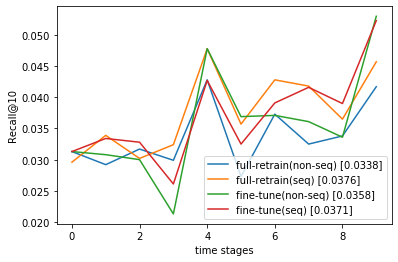

full-retrain(non-seq):	0.0338	
full-retrain(seq):	0.0376	
fine-tune(non-seq):	0.0358	
fine-tune(seq):	0.0371	


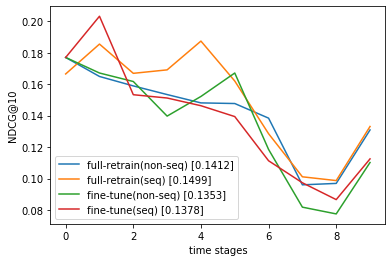

full-retrain(non-seq):	0.1412	
full-retrain(seq):	0.1499	
fine-tune(non-seq):	0.1353	
fine-tune(seq):	0.1378	


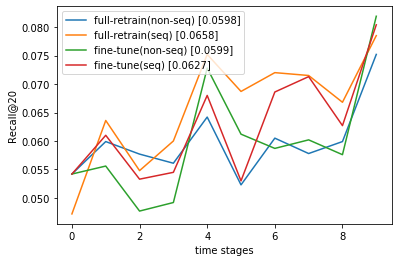

full-retrain(non-seq):	0.0598	
full-retrain(seq):	0.0658	
fine-tune(non-seq):	0.0599	
fine-tune(seq):	0.0627	


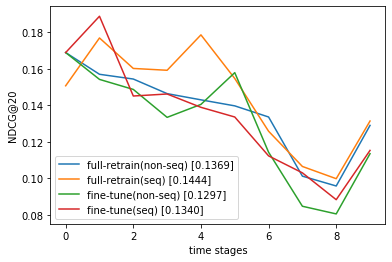

full-retrain(non-seq):	0.1369	
full-retrain(seq):	0.1444	
fine-tune(non-seq):	0.1297	
fine-tune(seq):	0.1340	


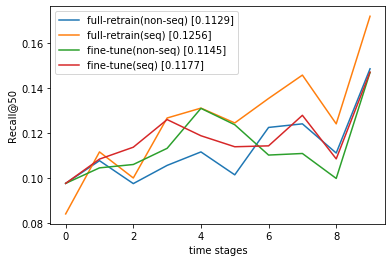

full-retrain(non-seq):	0.1129	
full-retrain(seq):	0.1256	
fine-tune(non-seq):	0.1145	
fine-tune(seq):	0.1177	


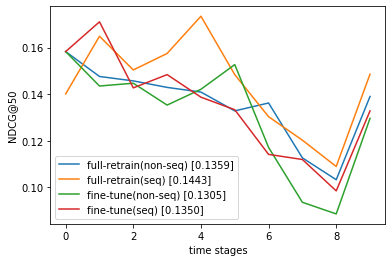

full-retrain(non-seq):	0.1359	
full-retrain(seq):	0.1443	
fine-tune(non-seq):	0.1305	
fine-tune(seq):	0.1350	


TypeError: can only concatenate str (not "float") to str

In [8]:
# LightGCN, Movielenz
create_trend(get_test_files())

test_result/BPR/Movielenz__size_0.6_256_s10__fulltrain/lr=0.001__l2=0.0001__epoch=500__tepoch=-1__num_neg=4__random_seed=2021/_test_trend
test_result/BPR/Movielenz__size_0.6_256_s10__fulltrain-seq/lr=0.001__l2=0.0001__epoch=500__tepoch=-1__num_neg=4__random_seed=2021/_test_trend
test_result/BPR/Movielenz__size_0.6_256_s10__finetune-nonseq/lr=0.001__l2=0.0001__epoch=500__tepoch=500__num_neg=4__random_seed=2021/_test_trend
test_result/BPR/Movielenz__size_0.6_256_s10__finetune/lr=0.001__l2=0.0001__epoch=500__tepoch=500__num_neg=4__random_seed=2021/_test_trend
Recall@10	0.0309	0.0278	0.0303	0.0289	0.0415	0.0291	0.0387	0.0338	0.033	0.0409	
Recall@10	0.0298	0.0322	0.0303	0.0296	0.0457	0.0299	0.0397	0.0465	0.043	0.0533	
Recall@10	0.0309	0.023	0.0278	0.0118	0.0285	0.0254	0.0393	0.0466	0.0373	0.0525	
Recall@10	0.0309	0.0275	0.0322	0.0328	0.0458	0.0348	0.0409	0.0457	0.0379	0.0536	
NDCG@10	0.1673	0.176	0.1531	0.1463	0.1576	0.1571	0.1136	0.0886	0.0955	0.1317	
NDCG@10	0.1675	0.1711	0.1829	0.1565	0.

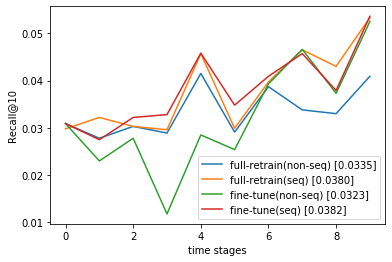

full-retrain(non-seq):	0.0335	
full-retrain(seq):	0.0380	
fine-tune(non-seq):	0.0323	
fine-tune(seq):	0.0382	


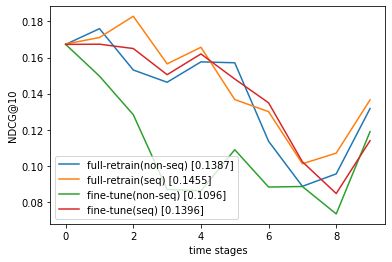

full-retrain(non-seq):	0.1387	
full-retrain(seq):	0.1455	
fine-tune(non-seq):	0.1096	
fine-tune(seq):	0.1396	


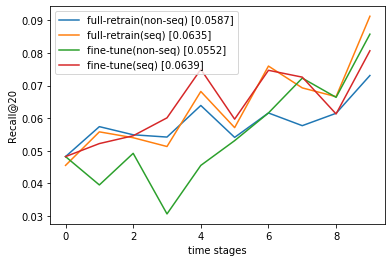

full-retrain(non-seq):	0.0587	
full-retrain(seq):	0.0635	
fine-tune(non-seq):	0.0552	
fine-tune(seq):	0.0639	


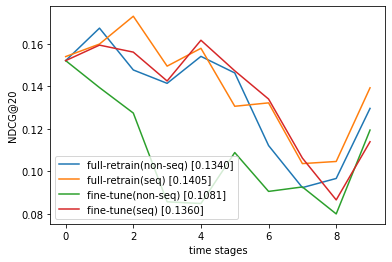

full-retrain(non-seq):	0.1340	
full-retrain(seq):	0.1405	
fine-tune(non-seq):	0.1081	
fine-tune(seq):	0.1360	


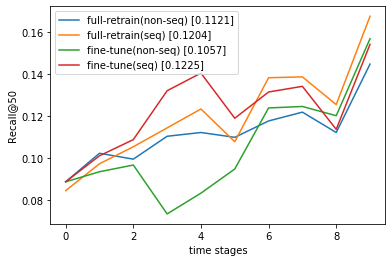

full-retrain(non-seq):	0.1121	
full-retrain(seq):	0.1204	
fine-tune(non-seq):	0.1057	
fine-tune(seq):	0.1225	


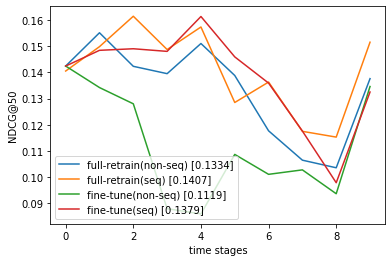

full-retrain(non-seq):	0.1334	
full-retrain(seq):	0.1407	
fine-tune(non-seq):	0.1119	
fine-tune(seq):	0.1379	


TypeError: can only concatenate str (not "float") to str

In [10]:
# BPR
create_trend(get_test_files())

# BPR
full-retrain(non-seq):	0.0335	
full-retrain(seq):	0.0380	
fine-tune(non-seq):	0.0323	
fine-tune(seq):	0.0382	

# LightGCN
full-retrain(non-seq):	0.0338	
full-retrain(seq):	0.0376	
fine-tune(non-seq):	0.0358	
fine-tune(seq):	0.0371	

: 